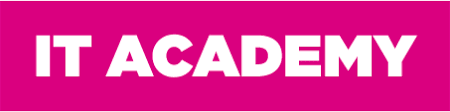

<div class="alert alert-block alert-info">\begin{align*}Alex\:Kumenius - Business\hspace{2mm}Intelligence\hspace{2mm}Data\hspace{2mm}Scientist\end{align*}

\begin{align*}Date : November\hspace{2mm}06^{th}\hspace{2mm}2020\end{align*}</div>

# <span style=color:darkblue>INFERENCE FOR NUMERICAL DATA</span>

## <span style=color:darkgreen>t-DISTRIBUTION</span>

We want <b>large samples</b> for <u>two main reasons</u> :   

1. The <span style=color:blue>sampling distribution of $\:\bar{x}\:$</span> tends to be <b>more normal</b> when <span style=color:blue><b>sample</b> is large</span>.   
$%$   
2. The calculated <span style=color:blue>standard error ($\:SE\:$)</span> is typically <b>very accurate</b> when using a <span style=color:blue>large <b>sample</b></span>.   

<span style=color:darkblue><b><u>So, what should we do when the sample size is small ?</u></b></span>   

if the <span style=color:blue>population data</span> are <b>nearly normal</b>, then <span style=color:blue>$\:\bar{x}\:$</span> will also follow a <span style=color:blue>normal distribution</span>, which addresses the first problem.   

The <b>accuracy</b> of the <span style=color:blue>standard error</span> is trickier, and for this challenge we’ll introduce a <b>new distribution</b> called the <span style=color:blue><b>t-distribution</b></span>.   

While we emphasize the use of the <span style=color:blue><b>t-distribution</b></span> for <span style=color:blue><b>small samples</b></span>, this distribution is <b>also</b> generally <b>used</b> for <span style=color:blue><b>large samples</b></span>, where it produces similar results to those from the <span style=color:blue><b>Normal Distribution</b></span>.   

<span style=color:blue><b><u>Central Limit Theorem</u></b></span> ensures the distribution of <span style=color:blue>sample means</span> will be <span style=color:blue>nearly normal</span>, <b>regardless</b> of <span style=color:blue>sample size</span>, when the data come from a nearly <span style=color:blue><u>Normal Distribution</u></span>.

<div class="alert alert-warning alert-danger">While this seems like a very helpful special case, there is one small problem. <b>It is inherently difficult to verify normality in small datasets.</b>
</div>

<div class="alert alert-warning alert-warning"><b><u>t-distribution</u></b>   
$%$   

In the cases where we will use a <span style=color:blue>small sample</span> to calculate the <span style=color:blue>standard error</span>, it will be useful to rely on a <b>new distribution for inference</b> calculations : the <span style=color:blue><b><u>t-distribution</u></b></span>.   
$%$   
A <span style=color:blue><b><u>t-distribution</u></b></span>, shown as a solid line, has a <b>bell shape</b>. However, its <b>tails are thicker</b> than the <i>normal model’s</i>. This means <b>observations</b> are more likely to fall beyond <span style=color:blue>two standard deviations</span> from the <span style=color:blue>mean</span> than under the <span style=color:blue>Normal Distribution</span>.   
$%$   
While our <b><i>estimate</i></b> of the <span style=color:blue>standard error</span> will be a little <b><i>less accurate</i></b> when we are analyzing a <span style=color:blue><b>small dataset</b></span>, these extra <b>thick tails</b> of the <span style=color:blue><b>t-distribution</b></span> <b>are exactly the correction</b> we need <b>to resolve</b> the problem of a <b>poorly</b> estimated <span style=color:blue>standard error</span>.   
$%$    
The <span style=color:blue><b><u>t-distribution</u></b></span>, always <b>centered at <u>zero</u></b>, has a <u>single parameter</u> : <span style=color:blue><b><u>Degrees of Freedom (df)</u></b></span>.</div>   

<div class="alert alert-warning alert-warning"><b><u>Degrees of freedom (df)</u></b>   

The <b><u>degrees of freedom</u></b> describe the <b>shape</b> of the <b>t-distribution</b>. The larger the <b>degrees of freedom</b>, the more closely the distribution approximates the <b>normal model</b>.   
$%$   
The <span style=color:blue><b><u>Degrees of Freedom (df)</u></b></span> describe the precise form of the bell-shaped <span style=color:blue><b><u>t-distribution</u></b></span>.   
$%$   
When the <span style=color:blue><b><u>Degrees of Freedom (df)</u></b></span> is about <b>30 or more</b>, the <span style=color:blue><b><u>t-distribution</u></b></span> is nearly <b>indistinguishable</b> from the <span style=color:blue><b><u>Normal Distribution</u></b></span>.

Several <span style=color:blue><b><u>t-distribution</u></b></span> are shown in next Plots. When there are more <span style=color:blue>degrees of freedom</span>, the <span style=color:blue><b><u>t-distribution</u></b></span> looks very much like the <span style=color:blue>Standard Normal Distribution</span>.

In [ ]:
import numpy as np
from scipy.stats import t as student_t
from matplotlib import pyplot as plt

# Define the distribution parameters to be plotted
mu = 0
k_values = [1E10, 16, 8, 2]
linestyles = ['-','--', ':', '-.']
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(12, 8))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}, df=\infty$'
    else:
        label = r'$\mathrm{t}, df=%.1f$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='darkblue', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

<div class="alert alert-success alert-sucess"><b>" t-distribution</b> allows us greater flexibility than the <b>normal distribution</b> when analyzing <b>numerical data "</b>.</div>

This shows an example of <span style=color:blue>Student’s t distribution</span> with various parameters. We’ll generate the distribution using:   
$%$   
<center><span style=color:blue><b>dist = scipy.stats.student_t(...)</b></span></center>   
   
Where <span style=color:blue>…</span> should be filled in with the desired <span style=color:blue>distribution parameters</span>. Once we have defined the <span style=color:blue>distribution parameters</span>, we can apply any of the many useful methods in the distribution object; for example:

1. <span style=color:blue>dist.pmf(x)</span> <i>computes the Probability Mass Function at values $x$ in the case of discrete distributions</i>.

2. <span style=color:blue>dist.pdf(x)</span> <i>computes the Probability Density Function at values $x$ in the case of continuous distributions</i>.

3. <span style=color:blue>dist.rvs(N)</span> <i>computes $N$ random variables distributed according to the given distribution.</i>

Many further options exist; refer to the documentation of <b>scipy.stats</b> for more details.

## <span style=color:darkgreen>Conditions for using the t-distribution for inference on a sample mean</span>

To proceed with the <span style=color:blue>t-distribution</span> for <b>inference</b> about a <span style=color:blue>single mean</span>, we first check two conditions :

- <span style=color:blue><b><u>Independence of observations</u></b></span>. We verify this condition. We collect a <span style=color:blue><b>Simple Random Sample</b> from less than <b>10%</b> of the population</span>, or if the data are from an experiment or random process, we check to the best of our abilities that the observations were independent.   
$%$   
- <span style=color:blue><b><u>Observations come from a nearly normal distribution</u></b></span>. This second condition is difficult to verify with <span style=color:blue>small datasets</span>. We often :   
$%$   
    - (i) take a look at a plot of the data for obvious deviations from the normal model, and   
    - (ii) consider whether any previous experiences alert us that the data may not be nearly normal.   
$%$   
- We may relax the nearly normal condition as the <span style=color:blue>sample size <b>increases</b></span>. 

    For example, the data distribution may be <b>moderately skewed</b> when the sample size is at least <b>30</b>. 

<div class="alert alert-warning alert-warning">   
$%$   
When examining a <span style=color:blue>sample mean</span> and estimated <span style=color:blue>standard error $\:SE\:$</span> from a <span style=color:blue>sample of $\:n\:$ <b>independent</b> and <b>nearly normal</b> observations</span>, we use a <span style=color:blue>t-distribution</span> with <span style=color:blue><b>$\:n\:$ − 1</b> degrees of freedom ( $df$ )</span>. 

For example, if the <b>sample size</b> was <b>19</b>, then we would use the <span style=color:blue>t-distribution</span> with <b>$df$ = 19 − 1 = 18</b> <span style=color:blue>degrees of freedom</span>. 

### <span style=color:darkred>t-Test Confidence Interval</span>

<div class="alert alert-warning alert-warning">   
$%$   
In the <span style=color:blue>normal model</span>, we used <span style=color:blue>$\:z^*\:$</span> and the <span style=color:blue><b>standard error</b></span> to determine the <b>width</b> of a <span style=color:blue><b>confidence interval</b></span>.   
$%$   

Based on a <b>sample</b> of $\:n\:$ <b>independent</b> and <b>nearly normal</b> observations. We revise the <span style=color:blue><b>confidence interval</b></span> formula slightly when using the <b>t-distribution </b>:   
$%$   

\begin{align*}\bar{x}\hspace{2mm}±\hspace{2mm}t^{*}_{df}SE\end{align*}    
$%$   
The value $\:t^{*}_{df}\:$ is a <b>cutoff</b> we obtain based on the <b>confidence level</b> and the <b>t-distribution</b> with <b>degrees of freedom ($\:df\:$)</b>.   

Before determining this <b>cutoff</b>, we will first need the <b><u>degrees of freedom</u></b>.


</div>

<span style=color:blue>T-tests</span> tells us whether a sample of numeric data differs significantly from the population.   

It also talks about two samples - whether they’re different.   

In other words, it gives us the probability of difference between populations. The test involves a <span style=color:blue>t-statistic</span>. For <span style=color:blue><b>small samples</b>, we can use a <span style=color:blue><b>T-test with two samples</b></span>.

### <span style=color:darkred>One-sample T-test</span>

<div class="alert alert-warning alert-warning"><b><u>Degrees of freedom for a single sample</u></b>

If the <b>sample</b> has <b>$\:n\:$</b> observations and we are examining a <b>single mean</b>, then we use
the <b>t-distribution</b> with $\:df\:$ = $\:n\:$ − 1 <b>degrees of freedom</b>.

<span style=color:red><b><u>EXAMPLE</u></b></span>

Here we identify a <b>confidence interval</b> for the average mercury content in dolphin muscle using a sample of 19 Risso’s dolphins. The data are summarized below. The <span style=color:blue>minimum and maximum</span> observed values can be used to <b>evaluate</b> whether or not there are obvious <span style=color:blue>outliers or skew</span>.


|$n$ |$\bar{x}$ |$s$ |minimum| maximum |
|--|---|--|-------|---------|
|19 |4.4| 2.3| 1.7| 9.2 |

<span style=color:blue><u>Are the independence and normality conditions satisfied for this dataset ?</u></span>   
$%$   
1. The observations are a <b>simple random sample</b> and consist of less than <b>10%</b> of the population, therefore <span style=color:blue>independence is reasonable</span>. 
2. The summary statistics in the table above, do <b>not suggest</b> any <span style=color:blue><b>skew or outliers</b></span>; 
3. all observations are <b>within 2.3</b> <span style=color:blue>standard deviations of the mean</span>. 

Based on this evidence, the <span style=color:blue>normality assumption seems <b>reasonable</b></span>.

The <span style=color:blue>sample mean</span> and estimated <span style=color:blue>standard error ($\:SE\:$)</span> are computed just as the <b>p-value</b> ($\:\bar{x}$ = 4.4).

\begin{align*}\:SE\hspace{2mm}=\hspace{2mm}\frac{s}{\sqrt{n}}\hspace{4mm}=\hspace{4mm}\frac{2.3}{\sqrt{19}}\hspace{4mm}=\hspace{4mm}0.528\end{align*}

In [ ]:
sigma = 2.3     # Standard Deviation of the mean
n = 19          # Sample size

SE = (sigma / np.sqrt(n))
SE.round(3)

In our current example, we should use the <span style=color:blue>t-distribution</span> with $\:df\:$ <b>= 19−1 = 18 degrees of freedom</b>. Then identifying $\:t^*\:$ <b>18</b> is similar to how we found $\:z^*\:$.

For a <span style=color:blue><b>95% confidence interval</b></span>, we want to find the <b>cutoff $\:t^*_{18}\:$</b> such that <b>95%</b> of the <span style=color:blue>t-distribution</span> is between $\:-t^*_{18}\:$ and $\:t^*_{18}\:$.

• If we would look at a t-table, (two tails), for <b>18</b> <span style=color:blue>degrees of freedom</span>: $\:t^*_{18}\:$ = 2.10.

In [ ]:
## Basic T-Distribution
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

## Setup  
n = 19          # Sample size
dof = (n-1)     # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t-score
t_18 = abs(st.t.ppf(alpha/ntails, dof))

t_18.round(2)

Finally, we can substitute all our values into the <span style=color:blue>confidence interval equation</span> to create the <b>95% confidence interval</b> for the <b>average</b> mercury content in muscles from Risso’s dolphins

\begin{align*}\bar{x}\hspace{2mm}±\hspace{2mm}t^{*}_{df}SE\hspace{4mm}=\hspace{4mm}4.4\hspace{2mm}±\hspace{2mm}2.10\hspace{2mm}x\hspace{2mm}0.528\hspace{4mm}=\hspace{4mm}(3.29,\hspace{2mm}5.51)\end{align*} 

<div class="alert alert-success alert-sucess">We are <b>95% confident</b> the average mercury content of muscles in Risso’s dolphins <b>$\:\bar{x}\:$= 4.4</b> is between <b>3.29</b> and <b>5.51 μg/wet gram</b>, which is considered <b><u>extremely high</u></b>.</div>

<div class="alert alert-warning alert-warning"><b><u>When using a t-distribution, we use a T-score (same as Z-score)</u></b>   
$%$   

To help us remember to use the <b>t-distribution</b>, we use a $\:T\:$ to represent the <b>test statistic</b>, and we often call this a <b>T-score</b>.   

The <b>Z-score</b> and <b>T-score</b> are <b>computed in the exact same way</b> and are conceptually <b>identical</b> : each represents how many <b>standard errors</b> the observed value is from the <b>null value</b>.

### <span style=color:darkred>Paired Data</span>

<div class="alert alert-warning alert-warning"><b><u>Paired Data</u></b>   
$%$   

<i><b>Two sets of observations</b></i> are <b><u>paired</u></b> if each <b>observation</b> in <b>one set</b> has a special <b>correspondence</b> or <b>connection</b> with exactly <b>one observation</b> in the other data set.</div>

<span style=color:darkblue><b><u>EXAMPLE - 7.1</u></b></span>   
$%$   
<span style=color:blue>Are textbooks actually cheaper online ?</span> 

Here we compare the price of <span style=color:blue>textbooks at the University of California, Los Angeles’ (UCLA’s) bookstore</span> and prices at <span style=color:blue>Amazon.com</span>. <b>73</b> <span style=color:blue>UCLA courses</span> were randomly sampled in <b>Spring 2010</b>, representing less than <b>10%</b> of <span style=color:blue>all UCLA courses</span>.

In [ ]:
import pandas as pd
UCLA_Amazon = pd.read_csv('D:\\Documents\\EureCat\\Eurecat 2019\\BTS\\Datasets\\UCLA_Amazon.csv', sep=',', encoding='utf-8', index_col=0)

Each textbook has <b><i>two corresponding prices</i></b> in the dataset : one for the <span style=color:blue>UCLA bookstore</span> and one for <span style=color:blue>Amazon</span>. Therefore, each textbook price from the <span style=color:blue>UCLA bookstore</span> has a natural correspondence with a textbook price from <span style=color:blue>Amazon</span>. When <i><u>two sets of observations</u></i> have this <b>special <u>correspondence</u></b>, they are said to be <span style=color:blue><b><u>paired</u></b></span>.

In [ ]:
UCLA_Amazon.shape

In [ ]:
UCLA_Amazon.head()

To analyze <span style=color:blue><b>paired data</b></span>, it is often useful to look at the <b>difference</b> in outcomes of each <span style=color:blue>pair of observations</span>. In the textbook dataset, we look at the <b>differences in prices</b>, which is represented as the <b><i>diff</i></b> variable in the textbooks data. Here the <b>differences</b> are taken as for each book. 

It is important that we always subtract using a consistent order; here <span style=color:blue>Amazon prices</span> are always <b>subtracted</b> from <span style=color:blue>UCLA prices</span>.

\begin{align*}UCLA\hspace{2mm}price - Amanzon\hspace{2mm}price\end{align*}

Using <b>differences</b> between <span style=color:blue><b>paired observations</b></span> is a common and useful way to analyze <span style=color:blue><b>paired data</b></span>.

In [ ]:
plt.hist(UCLA_Amazon['diff'],edgecolor='k')
plt.title("UCLA bookstore vs Amazon prices histogram",fontsize=12)
plt.xlabel("UCLA vs Amazon prices ($ USD)")
plt.ylabel("Frecuency")
plt.show()

In [ ]:
UCLA_Amazon['diff'].describe().round(3)

In [ ]:
n_diff, mean_diff, std_diff = (UCLA_Amazon['diff'].count(), UCLA_Amazon['diff'].mean(), UCLA_Amazon['diff'].std())

print('n_diff =', n_diff, '; mean_diff =', mean_diff.round(2), '; std_diff =', std_diff.round(2))

We are considering two scenarios: there is no difference or there is some difference in average prices :

- $H_{0}\::\:\mu_{diff}\:=\:0.\hspace{4mm}$ <i> There is <b>no difference</b> in the average textbook price</i>.
- $H_{A}\::\:\mu_{diff}\:\neq\:0.\hspace{4mm}$ <i>There is a <b>difference</b> in the average textbook price</i>.

<span style=color:blue><b><u>Can the t-distribution be used for this application ?</u></b></span>   

- The observations are based on a <span style=color:blue>simple random sample</span> from <b>less than 10%</b> of all books sold at the bookstore, so <span style=color:blue><b>independence</b></span> is reasonable.   
- While the distribution is <span style=color:blue>strongly skewed</span>, the sample is reasonably <span style=color:blue>large (n = 73)</span>, so we can proceed. 

Because the conditions are <i><u>reasonably satisfied</u></i>, we can apply the <span style=color:blue><b>t-distribution</b></span> to this setting.

<span style=color:blue><b><u>$1^{st}$ compute the standard error</u></b></span>   

We compute the <span style=color:blue>Standard Error ($\:SE\:$)</span> associated with <span style=color:blue>$\:\bar{x}_{diff}\:$</span> using the <span style=color:blue>standard deviation</span> of the differences (<span style=color:blue>$\:s_{diff}\:$</span>= <b>14.26</b>) and the <span style=color:blue>number</span> of differences ($\:n_{diff}\:=\:73\:$) :

\begin{align*}\:SE_{\bar{x}_{diff}}\hspace{2mm}=\hspace{2mm}\frac{s_{diff}}{\sqrt{n_{diff}}}\hspace{4mm}=\hspace{4mm}\frac{14.26}{\sqrt{73}}\hspace{4mm}=\hspace{4mm}1.67\end{align*}

In [ ]:
n = n_diff
x_diff = mean_diff
sigma = std_diff
alpha = 0.05

SE_x_diff = (sigma / np.sqrt(n))
print('The Standard Error for SE_x_diff is :', SE_x_diff.round(2))

<span style=color:blue><b><u>$2^{nd}$ compute the p-value</u></b></span>   

To find the tail areas, we compute the <b>test statistic</b>, which is the <span style=color:blue><b>T-score</b></span> of <span style=color:blue>$\:\bar{x}_{diff}\:$</span> under the <b>null condition</b> that the actual <b>mean difference</b> is <b>0</b> :    
$%$   
\begin{align*}T\:=\: \frac{Point\:Estimate\: - \:Null\:Value}{SE_{Point\:Estimate}}\:=\: \frac{\:\bar{x}_{diff}\: - \:Null\:Value}{SE_{\bar{x}_{diff}}}\:=\:\frac{\:12.76\: - \:0\:}{1.67}\:=\:7.65\end{align*}   

In [ ]:
n = n_diff
x_diff = mean_diff
NullVal = 0
SE = 1.67

Ttest = (x_diff - NullVal)/SE_x_diff
Ttest.round(2)

In [ ]:
x = mean_diff
NullVal = 0
sigma = std_diff
n = n_diff
alpha = 0.05
SE = (sigma/np.sqrt(n))

x_T_score = (x - NullVal) / SE
print('Standard Error (SE) of the Point Estimate = ',  round(SE, 2))
print('T-score = ',  round(x_T_score, 2))
print('alpha value = ',  round(alpha, 3))

In [ ]:
from scipy.integrate import quad

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

x_T_score

x_T_score_percentile, _ = quad(normalProbabilityDensity, np.NINF, x_T_score)

print('Point Estimate T-score Probability: ', round(x_T_score_percentile, 4))

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Calculate the T-test on TWO RELATED samples of scores, a and b.
Ttest, pvalue = stats.ttest_rel(a=UCLA_Amazon['uclaNew'],b=UCLA_Amazon['amazNew'])
print('Ttest values = ', Ttest.round(2)),
print('p-value = ', pvalue)

<div class="alert alert-success alert-sucess">
Because the <span style=color:blue>p-value</span> is less than <span style=color:blue>$\:\alpha\:$ = 0.05</span>, we <span style=color:red><b><u>reject</u></b></span> the <b>Null Hypothesis</b>.   

We have found <b>convincing evidence</b> that <b><u>Amazon</u></b> was, on average, <b>cheaper than</b> the <b>UCLA bookstore</b> for <b>UCLA</b> course textbooks.</div>   

In [ ]:
alpha
print(pvalue, ' p-value', ' < ', round(alpha, 4), 'alpha value')

<div class="alert alert-warning alert-warning"><b><u>What is a good p-Value ?</u></b>   
$%$   

- A <span style=color:blue><b><u>small p-value$\:$ ≤$\:$ 0.05</u></b></span> indicates <b>strong evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.   
$%$   
- A <span style=color:blue><b><u>large p-value$\:$ >$\:$ 0.05</u></b></span> indicates <b>weak evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>fail to reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.</div>

<span style=color:darkblue><b><u>EXAMPLE - 7.2</u></b></span>   
$%$   
Create a <span style=color:blue>95% confidence interval</span> for the <b>average price difference between books</b> at the <span style=color:blue>UCLA bookstore</span> and books on <span style=color:blue>Amazon</span>.   
$%$   
\begin{align*}\bar{x}\hspace{2mm}±\hspace{2mm}z^{*}SE_{\bar{x}}\hspace{2mm}=\hspace{2mm}12.76\:±\:1.99\:x\:1.67\:=\:(9.44,\:16.08)\end{align*}    
$%$   
We are <span style=color:blue>95% confident</span> that <span style=color:blue>Amazon</span> is, on average, between <span style=color:blue>$\:\$9.44\:$ and $\:\$16.08\:$</span> <b>cheaper than</b> the <span style=color:blue>UCLA bookstore</span> for <span style=color:blue>UCLA course books</span>.

### <span style=color:darkred>Difference of two means</span>

we consider a <span style=color:blue>difference in two population means, $\:\mu_1\:−\:\mu_2\:$</span>, under the condition that the data are <span style=color:blue><u><b>not paired</b></u></span>. Just as with a <span style=color:blue>single sample</span>, we identify conditions to ensure we can use the <span style=color:blue><b>t-distribution</b></span> with a <span style=color:blue>point estimate</span> of the difference, <span style=color:blue>$\:\bar{x}_1\:−\:\bar{x}_2\:$</span>.

#### <span style=color:gray>Confidence Interval for a difference of means</span>

<div class="alert alert-warning alert-warning"><b><u>Using the t-distribution for a difference in means</u></b>   
$%$   

Using the <b>t-distribution</b> for a difference in <b><u>means</u></b>. The <b>t-distribution</b> can be used for inference when working with the standardized difference of <b>two means</b> if :   
$%$   
1) each <b>sample</b> meets the conditions for using the <b>t-distribution</b> and   
2) the <b>samples</b> are <b><u>independent</u></b>.</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [ ]:
birthsD = pd.read_csv('D:\\Documents\\EureCat\\Eurecat 2019\\BTS\\Datasets\\births.txt', sep='\t', encoding='utf-8', index_col=0)

<span style=color:darkblue><b><u>EXAMPLE - 7.3</u></b></span>   
$%$   
Set up appropriate <span style=color:blue>hypotheses</span> to evaluate whether there is a <span style=color:blue>relationship</span> between a <b>mother smoking</b> and <b>average birth weight</b>.   

The <span style=color:blue>Null Hypothesis</span> represents the case of no difference between the groups :

- <span style=color:blue>$H_0:\hspace{2mm}\mu_n\:-\:\mu_s\:=\:0\:$</span>,$\hspace{5mm}$There is no difference in average birth weight for newborns from mothers who <b>did and did not smoke.</b>
- <span style=color:blue>$H_A:\hspace{2mm}\mu_n\:-\:\mu_s\:\neq\:0\:$</span>,$\hspace{5mm}$There is some difference in average birth weights for newborns from mothers who <b>did and did not smoke.</b>   
$%$   
where <span style=color:blue>$\:\mu_n\:$</span> represents <b>non-smoking</b> mothers and <span style=color:blue>$\:\mu_s\:$</span> represents mothers who <b>smoked</b>.

In [ ]:
birthsD.head()

In [ ]:
birthsD.describe()

In [ ]:
birthsD.shape

determining whether <b>stem cells</b> can <b>improve</b> heart function

In [ ]:
group_smoke = birthsD.groupby(['smoke'])

In [ ]:
group_smoke.weight.count()

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
s_smoker = birthsD.loc[birthsD['smoke'] == 'smoker']

ax1.hist(s_smoker['weight'], edgecolor='k')
plt.title("Baby Births weights - smoker Mom's Histogram",fontsize=12)
plt.xlabel("Births weights (lbs) from mothers who smoked")
plt.ylabel("Frecuency")

ax2 = fig.add_subplot(1, 2, 2)
s_n_smoker = birthsD.loc[birthsD['smoke'] == 'nonsmoker']

ax2.hist(s_n_smoker['weight'], edgecolor='k')
plt.title("Baby Births weights - NON-smoker Mom's Histogram",fontsize=12)
plt.xlabel("Births weights (lbs) from mothers who did NOT smoke")

plt.show()

<span style=color:blue><i>We check the <u>two conditions necessary</u> to apply the <u>t-distribution</u> to the difference in <u>sample means</u></i></span>. 

1) Data come from a <span style=color:blue>simple random sample</span> and consist of <b>less than 10%</b> of all such cases, the observations are <span style=color:blue><b>independent</b></span>.   
   Additionally, while each distribution is <span style=color:blue><b>strongly skewed</b></span>, the <span style=color:blue>sample sizes</span> of <b>50</b> and <b>100</b> would make it reasonable to model each <span style=color:blue>mean</span> separately using a <span style=color:blue><b>t-distribution</b></span>. The <span style=color:blue><b>skew</b></span> is reasonable for these <span style=color:blue>sample sizes of 50 and 100</span>.   

2) The <span style=color:blue><b>independence</b></span> reasoning applied in <b>(1)</b> also ensures the <b>observations</b> in each <span style=color:blue>sample</span> are <span style=color:blue><b>independent</b></span>. Since both conditions are satisfied, the difference in sample means may be modeled using a <span style=color:blue><b>t-distribution</b></span>.

In [ ]:
group_smoke.mean().round(2)

What is the <span style=color:blue>point estimate</span> of the population difference, $\:\mu_n\:-\:\mu_s\:$ ?   

The difference in <span style=color:blue>sample means</span> is a good <span style=color:blue>point estimate :</span>   

\begin{align*}\bar{x}_{n}\:-\:\bar{x}_{s}\:=\:7.18\:-\:6.78\:=\:0.40\end{align*}

In [ ]:
#group_smoke.loc(['nonsmoker','weight'])

x_n = birthsD.loc[birthsD['smoke'] == 'nonsmoker'].weight.mean().round(2)
x_s = birthsD.loc[birthsD['smoke'] == 'smoker'].weight.mean().round(2)

x_point_estimate = (x_n - x_s)
x_point_estimate.round(3)

<div class="alert alert-warning alert-warning"><b><u>Distribution of a difference of sample means</u></b>   
$%$   

The <b>sample difference of two means</b>, $\:\bar{x}_{1}\:−\:\bar{x}_{2},\:$ can be modeled using the <b>t-distribution</b> and the <b>standard error :</b>   
$%$   

\begin{align*}\:SE_{\bar{x}_{\bar{x}_{1}−\bar{x}_{2}}}\hspace{2mm}=\hspace{2mm}{\sqrt{\frac{\sigma^{2}_{1}}{n}\:+\:\frac{\sigma^{2}_{2}}{n}}}\hspace{4mm}\approx\hspace{2mm}{\sqrt{\frac{s^{2}_{1}}{n}\:+\:\frac{s^{2}_{2}}{n}}}\end{align*}   
$%$  
when each <b>sample mean</b> can itself be modeled using a <b>t-distribution</b> and the <b>samples</b> are <b><u>independent</u></b>.   

To calculate the <b>degrees of freedom</b>, use the <u>smaller</u> of $\:n_1\:−\:1$ and $\:n_2\:−\:1$.
</div>

Compute the <span style=color:blue>standard error</span> of the <span style=color:blue>point estimate</span> of the population difference, $\:\mu_n\:-\:\mu_s\:$.

In [ ]:
group_smoke.std().round(2)

\begin{align*}\:SE_{\bar{x}_{\bar{x}_{1}−\bar{x}_{2}}}\hspace{2mm}=\hspace{2mm}{\sqrt{\frac{s^{2}_{n}}{n_n}\:+\:\frac{s^{2}_{s}}{n_s}}}\hspace{4mm}=\hspace{2mm}{\sqrt{\frac{1.60^{2}}{100}\:+\:\frac{1.43^{2}}{50}}}\hspace{4mm}= \hspace{4mm}0.26\end{align*}   

Compute the <span style=color:blue>p-value</span> of the <b>hypothesis test</b>, and evaluate the hypotheses using a <span style=color:blue>significance level of $\:\alpha\:$ = 0.05</span>.   

We start by computing the <span style=color:blue><b>T-score</b></span> :

\begin{align*}T\:=\: \frac{Point\:Estimate\: - \:Null\:Value}{SE_{Point\:Estimate}}\:=\:\frac{\:0.40\: - \:0\:}{0.26}\:=\:1.54\end{align*}   

In [ ]:
x = x_point_estimate
NullVal = 0
SE = 0.26

x_Ttest = (x - NullVal)/SE
x_Ttest.round(2)

In [ ]:
from scipy.integrate import quad

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

x_Ttest

x_Ttest_percentile, _ = quad(normalProbabilityDensity, np.NINF, x_Ttest)

print('Point Estimate T-score Probability :', round(x_Ttest_percentile, 4), ' p-value :', round((1-x_Ttest_percentile), 4))

<div class="alert alert-success alert-success"><span style=color:darkblue><b>CONCLUSIONS</b></span>

Next, we compare this value to values. This <b>p-value</b> is larger than the significance value, $\:\alpha\:=\:0.05,\:$ so we fail to <span style=color:red>reject</span> the <span style=color:blue>Null hypothesis</span>. 

There is <b>insufficient evidence</b> to say there is a difference in average birth weight of newborns from North Carolina mothers who did smoke during pregnancy and newborns from North Carolina mothers who did not smoke during pregnancy.</div>

---

## <span style=color:darkgreen>ANOVA - Analysis of Variance - Comparing Many Means</span>

Sometimes, we want to compare <span style=color:blue><b>means</b></span> <b>across many groups</b>. For this task we will use <span style=color:blue><b>analysis of variance (ANOVA)</b></span> and a new <b>test statistic</b> called <span style=color:blue><b>$\:F\:$</b></span>. <span style=color:blue><b>ANOVA</b></span> uses a <span style=color:blue>single hypothesis test</span> to check whether the <span style=color:blue><i>means across many groups are equal</i></span> :

- <span style=color:blue>$H_0\:$</span>: The <b>mean outcome</b> is the same across <b>all groups</b>. In statistical notation, <span style=color:blue>$\:\mu_1\:=\:\mu_2\:=\:· · ·\:=\:\mu_k\:$</span> where <span style=color:blue>$\:\mu_i\:$</span> represents the <b>mean of the outcome</b> for observations in category <span style=color:blue>$\:i\:$</span>.   
$%$   
- <span style=color:blue>$H_A\:$</span>:: At least <span style=color:blue>one mean</span> is <b>different</b>.

<div class="alert alert-warning alert-warning"><b><u>The F statistic and the F test</u></b>   
$%$   
we must <span style=color:blue>check three conditions</span> on the data before performing <span style=color:blue><b>ANOVA</b></span> :   

1. the <i>observations</i> are <b>independent within</b> and <b>across</b> <span style=color:blue>groups</span>,   
2. the data <span style=color:blue>within each group</span> are <span style=color:blue>nearly normal</span>, and   
3. the <span style=color:blue><b>variability</b></span> across the <b>groups</b> is about <b>equal</b>.    
</div>

When these three conditions are met, we may perform an <span style=color:blue><b>ANOVA</b></span> to determine whether the data provide <b>strong evidence</b> against the <span style=color:blue><b>Null Hypothesis</b></span> that all the <span style=color:blue>$\:\mu_i\:$</span> are <b>equal</b>.

<div class="alert alert-warning alert-warning"><b><u>The F statistic and the F test</u></b>   
$%$   

<b><u>Analysis of variance</u> (ANOVA)</b> is used to <b>test</b> whether the <b>mean</b> outcome <b>differs across 2 or more groups</b>.   
$%$   
<b>ANOVA</b> uses a <b>test statistic</b> $\:F,\:$ which represents a <i>standardized <u>ratio of variability</u> in the <u>sample means</u> relative to the <u>variability</u> <b>within the groups</b></i>.   
$%$   
If $\:H_0\:$ is <b>true</b> and the <b><i>model assumptions are satisfied</i></b>, the statistic $\:F\:$ follows an <b>f-distribution</b> with <b>parameters</b> $\:df_1\:=\:k\:−\:1\:$ and $\:df_2\:=\:n\:−\:k\:$.   
$%$   
<b>$k\:$</b> = number of groups (<b>degrees of freedom</b>)   
<b>$n\:$</b> = number of observations   
$%$   
The <b>upper tail</b> of the <b>f-distribution</b> is used to represent the <b>p-value</b>.

<div class="alert alert-danger alert-danger"><b><u>Important Note</u></b>   
$%$   

It’s also important to note, when performing an <b>F-test</b> you’ll <b><u>ever perform a single sided F-test</u></b> and <b><u>not a two sided test</u></b>.   
$%$   
The <b>F-statistic</b> will <b>always be <u>positive</u></b>, as it is not possible for it to be <b>negative</b> as it is computed from the <b>ratio of <u>two variances</u></b>.   

Even if the <b>variance within groups</b> number is quite large, the resulting <b>F-statistic</b> would be close — but not below — zero.</div>

<span style=color:darkblue><b><u>EXAMPLE 7.4</u></b></span>

### <span style=color:darkred>Is batting performance related to player position in MLB ?</span>

We would like to <b>discern</b> whether there are <span style=color:blue><i><u>real differences</u></i></span> between the <span style=color:blue><b>batting performance</b></span> of baseball players according to <span style=color:blue><b><i>their position</i></b></span> : 

- <span style=color:blue>outfielder - <b>(OF)</b></span>, 
- <span style=color:blue>designated hitter - <b>(DH)</b></span>, and 
- <span style=color:blue>catcher - <b>(C)</b></span>. 

We will use a dataset called <span style=color:blue>mlbBat10</span>, which includes batting records of <span style=color:blue>694 Major League Baseball (MLB)</span> players from the 2010 season.   

The measure we will use for the <span style=color:blue>player batting performance</span> (the outcome variable) is <span style=color:blue><b>on-base percentage (OBP)</b></span>.   

The <span style=color:blue><b>on-base percentage (OBP)</b></span> roughly represents the <b><i>fraction</i></b> of the time a player successfully gets on base or hits a home run.

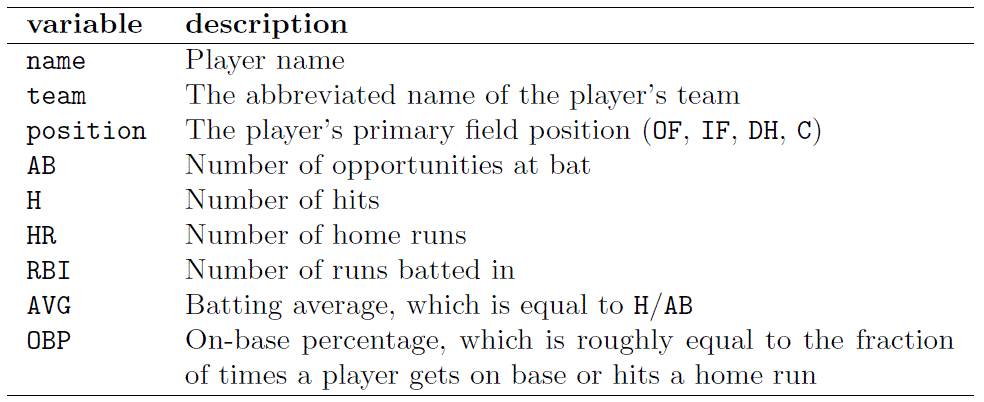

In [ ]:
bat10 = pd.read_csv('D:\\Documents\\EureCat\\Eurecat 2019\\BTS\\Datasets\\mlbBat10_samp.txt', sep='\t', encoding='utf-8', 
                    usecols=[0,1,2,4,6,9,10,18,16])

In [ ]:
bat10.head()

In [ ]:
bat10.shape

In [ ]:
# Checking position variables

group = bat10.groupby('position')
group.position.count()

In [ ]:
bat10.groupby('position').mean().round(3)

In [ ]:
print(bat10.mean())

<span style=color:darkblue><b><u>EXAMPLE 7.5</u></b></span>   

Write the <span style=color:blue>null and corresponding alternative hypotheses</span> in plain language. And its <span style=color:blue>Statistical notation</span> :

- <span style=color:blue>$H_0\:$</span>: The average on-base percentage is equal across the four positions. 
- <span style=color:blue>$H_A\:$</span>: The average on-base percentage varies across some (or all) groups.

The Statistical notation for the <span style=color:blue><b>null hypothesis</b></span> is the following :   
$%$   
<span style=color:blue>\begin{align*}\mu_{OF}\hspace{2mm}=\hspace{2mm}\mu_{DH}\hspace{2mm}=\hspace{2mm}\mu_{C}\end{align*}</span> 

<span style=color:darkblue><b><u>EXAMPLE 7.6</u></b></span>   

The player positions have been divided into three groups: <span style=color:blue>outfield (OF), designated hitter (DH), and catcher (C)</span>. 

<span style=color:blue><i>What would be an appropriate point estimate of the <b>on-base percentage by outfielders</b>, $\:\mu_{OF}$ ?</i></span>

<span style=color:blue><b>PREPARE THE DATASET FOR ANALYSIS</b>

In [ ]:
# Create a New Dataset with variables of interest

bat10_FP = bat10[['position', 'AB', 'H', 'HR', 'RBI', 'OBP', 'AVG']]

In [ ]:
bat10_FP.head()

In [ ]:
# Selecting the dataset rows of interest

playersP = ['OF', 'DH', 'C']
bat10_P = bat10_FP.position.isin(playersP)

bat10_Pp = bat10_FP[bat10_P]
bat10_Pp.head()

In [ ]:
# Checking the size of the dataset

bat10_Pp.shape

In [ ]:
# Verifying unique value of interest of dataset

bat10_Pp.position.unique()

A <b>good estimate</b> of the <span style=color:blue><i><b>on-base percentage by outfielders</b></i></span> would be the <b>sample average of OBP</b> for just those players whose <b>position is outfield</b> :   
$%$   
<center><span style=color:blue><b>$\:\bar{x}_{OF}\:=\:0.312$</b></span>.</center>

Notice that the <b>variability</b> appears to be approximately constant across groups; <span style=color:blue>nearly constant variance across groups</span> is an <b>important assumption</b> that must be satisfied before we consider the <span style=color:blue><b>ANOVA approach</b></span>.

In [ ]:
bat10_Pp.groupby('position')[['OBP']].mean().round(3) 

In [ ]:
bat10_Pp.groupby('position')[['OBP']].std().transpose().round(3) 

In [ ]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

In [ ]:
# isolate the variables of interest

rp.summary_cont(bat10_Pp['OBP']).round(3)

In [ ]:
rp.summary_cont(bat10_Pp['OBP'].groupby(bat10_Pp['position'])).round(3)

## <span style=color:darkgreen>Analysis of variance (ANOVA) and the F test</span>

The method of analysis of variance in this context focuses on answering one question:

<span style=color:blue><i>is the <u>variability in the sample means</u> so large that it seems <u>unlikely</u> to be from chance alone ?</i>   
    
we will <i>simultaneously</i> consider <b>many groups</b>, and evaluate whether their <b>sample means</b> <i>differ more than we would expect from natural variation</i>.

We call this <b>variability</b> the <span style=color:blue><b>mean square between groups (MSG)</b></span>, and it has an associated <span style=color:blue><b>degrees of freedom</b></span>, <span style=color:blue>$\:df_G\:=\:k\:−\:1\:$</span> when there are <span style=color:blue>$\:k\:$ groups</span>. The <span style=color:blue><b>MSG</b></span> can be thought of as a <i><b>scaled variance formula for means</b></i>.   

If the <span style=color:blue>Null Hypothesis is <b>true</b></span>, any variation in the <b>sample means</b> is due to chance and shouldn’t be <b>too large</b>.

The <span style=color:blue><b>mean square between groups (MSG)</b></span> is, on its own, quite <b>useless</b> in a <span style=color:blue><u>hypothesis test</u></span>.   

We need a <b>benchmark value</b> for how much <span style=color:blue>variability</span> should be <b>expected</b> among the <span style=color:blue>sample means</span> if the <span style=color:blue>null hypothesis is <b>true</b></span>. So, we <b>compute a pooled variance estimate</b>, <span style=color:blue><b>mean square error (MSE)</b></span>, which has an associated <span style=color:blue>degrees of freedom value</b> $\:df_E\:=\:n\:−\:k\:$</span>.    

Think of <span style=color:blue><b>mean square error (MSE)</b></span> as a <b>measure</b> of the <span style=color:blue>variability within the groups</span>.

<div class="alert alert-warning alert-warning"><b><u>The F statistic and the F test</u></b>   
$%$   

When the <b>Null Hypothesis is true</b>, any differences among the <b>sample means</b> are only due to chance, and the <b>MSG</b> and <b>MSE</b> should be <b><u>about equal</u></b>. As a <b>test statistic</b> for <b>ANOVA</b>, we examine the fraction of <b>MSG</b> and <b>MSE</b> :   
$%$   
\begin{align*}F\:=\:\frac{MSG}{MSE}\end{align*}   
$%$   
- The <b>MSG</b> represents a measure of the <b><u>between-group</u> variability</b>, and   
$%$      
- <b>MSE</b> measures the <b> variability <u>within each</u> of the groups</b>

If our <b>null hypothesis</b> is correct that all the <b>means</b> of the groups are <b>equal</b>, the numerator and denominator should be roughly close to the same and the statistic <b>should be near <u>1.0</u></b>. 

And, with a <b>higher ratio</b> — when the F-statistic is far <b>greater than 1.0</b> — <i><u>implies the samples are drawn from populations with quite different mean values</u></i>.

Now that we have <b>validated our assumptions</b>, we can finally <b>run the F-test</b>. 

We’ll be using the <span style=color:blue>scipy package <b>f_oneway()</b></span> to test our <span style=color:blue>Null hypothesis</span> that two or more groups have the <b>same</b> <span style=color:blue>population mean</span>.

We need to evaluate the <span style=color:blue>F-Statistic</span> against a <b>critical point</b> on the <span style=color:blue>F-Distribution</span> to <i>determine</i> if our result is <b>significant</b>.

In [ ]:
tstats, pvalue = stats.f_oneway(bat10_Pp['OBP'][bat10_Pp['position'] == 'C'], 
                                bat10_Pp['OBP'][bat10_Pp['position'] == 'DH'],
                                bat10_Pp['OBP'][bat10_Pp['position'] == 'OF'])

print('t-statistics value = ', tstats.round(3), ' p-value = ', pvalue.round(4) )

Our <span style=color:blue>F-statistic</span> of <b>3.531</b> suggests the <span style=color:blue>between-groups variance</span> is <b>3.5 times</b> the <span style=color:blue>within-group variance</span>.   

Now we know the <b>ratio of our variances <i>doesn’t equal one</i></b>, and the <span style=color:blue>Null hypothesis</span> of <b>equal mean values</b> is <span style=color:red>rejected</span> due to the <span style=color:blue>p-value being $\:<\:$ <b>0.05</b></span>.

## <span style=color:darkgreen>F-Distribution</span>

Let’s overview the <span style=color:blue><b>F-distribution</b></span> as we’re using it to evaluate our <span style=color:blue><b>F-statistic</b></span>. We evaluate the <span style=color:blue><b>F-statistic</b></span> at a <b>95% Confidence Interval</b>, and to determine the shape of our distribution we need the <span style=color:blue><b>$\:df_n\:$ (degrees of freedom <u>numerator</u>)</b></span> and <span style=color:blue><b>$\:df_d\:$ (degrees of freedom <u>denominator</u>)</b></span>.

In [ ]:
# F-distribution parameters

k = 3
N = len(bat10_Pp)
dfn = k - 1
dfd = N - k
print('df numerator =',dfn, ';  df denominator =',dfd)

Were <span style=color:blue><b>$\:k\:$</b></span> is the <b>number of comparison groups</b> — in our case three — and <span style=color:blue><b>$\:N\:$</b></span> is the <b>total number of observations</b> in the analysis, which is <b>337</b>.

So for our data, the rejection decision is: 

<span style=color:red><b>Reject $\:H_0\:$</b></span> in <span style=color:blue><b>favour of $\:H_A\:$</b></span> if statistic equals <b> 3.531</b>. And, from our work previously done, we know from our calculated <span style=color:blue><b>t-statistic</b></span> value is <b>large, 3.51</b>, so we will <span style=color:red><b>reject $\:H_0\:$</b></span>.

In [ ]:
from scipy.stats import f, norm
def plot_f_distrubiton():
    # Set figure 
    plt.figure(figsize=(12, 8))
    
    # Set degrees of freedom
    dfn 
    dfd
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), 
                    f.ppf(0.99, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.vlines(rejection_reg, 0.0, 1.0, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))
plot_f_distrubiton();

Performing <span style=color:blue>f_oneway</span> leaves much to be desired, and <b>much of the analysis</b> and <b>understanding of the calculation</b> are put in a <u>black box</u>.   

For instance, do you know:   

- <span style=color:blue>What are the sum of squares ?</span>   
- <span style=color:blue>How do the coefficient values interact with each other ?</span>   
- <span style=color:blue>The significance of each group ?</span>   

The <span style=color:blue><b>Analysis of Variance (ANOVA)</b></span> will assign the total variation of each independent variable, and tests each for its significance against the dependent variables. And it will illuminate some of the abstraction our one way <b>F-test</b> hidden from us.   

To do this we run a <span style=color:blue><b>regular <u>ols regression</u></b></span> of with <b><i>'OBP'</i></b> as the <i>dependent variable</i>, and our target <b>'position' types</b> as the <span style=color:blue>categorical independent</span> variables.

In [ ]:
results = ols('OBP ~ C(position)', data=bat10_Pp).fit()
results.summary()

We got the same <span style=color:blue>F-statistic</span> as before — we’re still <span style=color:red>rejecting $\:H_0\:$</span> so nothing has changed — however, we’re able to break it down more, as we have more information on how our result calculated.

<div class="alert alert-warning alert-warning"><b><u>The F statistic </u></b>   
$%$   

<b>F-statistic</b> = variance <b>between</b> groups / variance <b>within</b> groups     
$%$   
<b>Mean Squared Between</b> = MSB / (k-1)   
$%$  
<b>Mean Squared Error</b> = MSE / (n-k)   
$%$   
- <b>MSB</b> = sum of the squared error between each group mean and the overall mean   
- <b>MSE</b> = sum of the squared error between each observation and its own group mean   

<b>$k\:$</b> = number of groups (<b>degrees of freedom</b>)   
<b>$n\:$</b> = number of observations   

But we still don’t have the <b>MSB</b> and <b>MSE</b> from the <b>ANOVA</b> table to compute the <b>F-statistic</b> ourself. For that we’ll need anova_lm from the stats package.

In [ ]:
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

In [ ]:
MSG = 0.017664 / 2.0   
MSE = 0.835380 / 334.0

# Calculate our F-statistic
print(round((MSG) / (MSE),2))

<div class="alert alert-success alert-sucess">Now we know how to correctly compute this statistic.</div>

---